In [1]:
%pylab inline
from astropy.io import fits
from astropy.table import Table
from simqso.sqrun import buildWaveGrid,load_sim_output
from simqso import hiforest
from simqso.sqmodels import WP11_model
import bossqsos

Populating the interactive namespace from numpy and matplotlib


### Input luminosity function

Text(0,0.5,'log Phi')

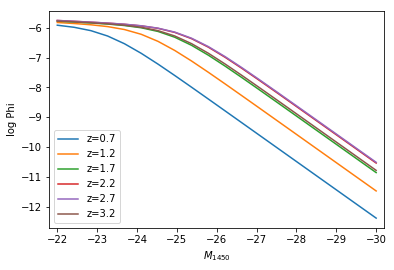

In [2]:
M1450 = linspace(-30,-22,20)
zz = arange(0.7,3.5,0.5)
ple = bossqsos.BOSS_DR9_PLE()
lede = bossqsos.BOSS_DR9_LEDE()
for z in zz:
    if z<2.2:
        qlf = ple if z<2.2 else lede
    plot(M1450,qlf(M1450,z),label='z=%.1f'%z)
legend(loc='lower left')
xlim(-21.8,-30.2)
xlabel("$M_{1450}$")
ylabel("log Phi")

### Run the simulation, save the spectra

In [3]:
_ = bossqsos.qsoSimulation(bossqsos.simParams,saveSpectra=True)

boss_dr9qlf_sim output not found
generating QSO grid
integration returned  390  objects
... building continuum grid
simulating  390  quasar spectra
units are  flux
max number iterations:  5
mapping photometry
               stage     time  elapsed     frac
     Initialize Grid    2.744    2.744    0.032
   Generate Features    0.728    3.472    0.009
Build Quasar Spectra   82.069   85.541    0.959
            PhotoMap    0.016   85.557    0.000
              Finish    0.000   85.557    0.000



### Simulation outputs

In [4]:
wave,qsos = load_sim_output('boss_dr9qlf_sim','.')

the table of simulated quasars, including redshift, luminosity, synthetic flux/mags in nine bands, and "observed" photometry with errors included.

also includes details of the model inputs for each quasar: `slopes` is the set of broken power law slopes defining the continuum, `emLines` is the set of Gaussian parameters for each emission line (wave, EW, sigma) measured in the rest frame.

In [5]:
qsos[::40]

absMag,appMag,z,slopes [5],"emLines [62,3]",igmlos,synMag [9],synFlux [9],obsFlux [9],obsFluxErr [9],obsMag [9],obsMagErr [9],spec [2304]
float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32
-24.6856,20.846,3.38965,-1.79535 .. -1.13996,1033.72 .. 257.285,174,24.3515 .. 20.6671,0.181726 .. 5.40965,-0.177366 .. 6.42841,0.268415 .. 2.0087,25.2823 .. 20.4797,0.879222 .. 0.339251,0.0 .. 0.0112628
-24.505,20.5976,2.9546,-1.19237 .. -1.15079,1033.99 .. 290.434,100,22.2512 .. 19.9946,1.25757 .. 10.0496,1.26722 .. 10.581,0.261168 .. 1.85914,22.2291 .. 19.9387,0.218488 .. 0.190764,7.91128e-06 .. 0.0263321
-24.6338,20.9484,3.48486,-1.53193 .. -1.10154,1034.37 .. 339.704,120,24.9756 .. 20.1822,0.102274 .. 8.45476,0.080238 .. 9.61293,0.192477 .. 1.69566,24.3268 .. 20.0429,0.717452 .. 0.19151,1.2102e-09 .. 0.0153086
-24.34,21.1627,3.37231,-1.62156 .. -1.13246,1033.33 .. 328.808,75,23.2182 .. 20.8799,0.516105 .. 4.44666,0.542061 .. 4.16202,0.174958 .. 1.4436,23.098 .. 20.9517,0.311342 .. 0.376576,0.0 .. 0.00729482
-23.6184,21.1631,2.37851,-1.20363 .. -0.703564,1034.41 .. 316.134,156,21.6813 .. 20.5245,2.12552 .. 6.16888,2.09932 .. 9.94888,0.201327 .. 1.99426,21.6893 .. 20.0056,0.103206 .. 0.217629,1.50076 .. 0.00636894
-24.3623,20.9077,3.04106,-2.03431 .. -0.887933,1033.79 .. 226.294,180,22.7992 .. 21.1283,0.759106 .. 3.53752,0.414685 .. 3.22433,0.224871 .. 1.34024,23.3482 .. 21.2289,0.487931 .. 0.451287,1.56249e-20 .. 0.00911326
-25.0609,19.9881,2.85412,-1.6036 .. -0.915233,1033.64 .. 300.517,12,21.8547 .. 19.5481,1.81183 .. 15.1623,2.08349 .. 14.1857,0.260983 .. 1.75529,21.6974 .. 19.6204,0.134786 .. 0.134341,0.0 .. 0.0197842
-24.358,20.7562,2.89916,-1.56836 .. -0.987723,1033.43 .. 260.457,131,22.0414 .. 21.0369,1.52555 .. 3.84813,1.5072 .. 6.41571,0.296009 .. 1.67873,22.0446 .. 20.4819,0.209642 .. 0.284084,1.25003 .. 0.00670096
-22.8241,21.721,2.05311,-1.53718 .. -0.785295,1034.31 .. 287.765,187,21.3757 .. 21.4644,2.81654 .. 2.59551,3.11615 .. 3.19697,0.247343 .. 1.38112,21.2631 .. 21.2382,0.0858312 .. 0.469031,1.46555 .. 0.00445822


the distribution in g-band magnitude:

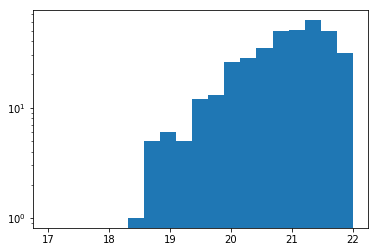

In [6]:
_ = hist(qsos['obsMag'][:,1],linspace(17,22,20),log=True)

color-color diagram from __observed__ magnitudes, including errors:

(-0.5, 1.5)

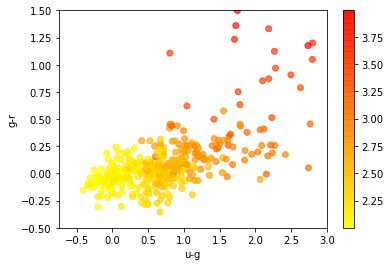

In [7]:
scatter(qsos['obsMag'][:,0]-qsos['obsMag'][:,1],qsos['obsMag'][:,1]-qsos['obsMag'][:,2],
        c=qsos['z'],cmap=cm.autumn_r,alpha=0.7)
colorbar()
xlabel('u-g')
ylabel('g-r')
xlim(-0.75,3)
ylim(-0.5,1.5)

the list of emission lines in the model:

In [8]:
qsodatahdr = fits.getheader('boss_dr9qlf_sim.fits',1)
for i,n in enumerate(qsodatahdr['LINENAME'].split(',')):
    print('%d:%s, '% (i,n,),end=" ")
print()

0:LyB,  1:ArI,  2:FeIII:UV1,  3:CIII*,  4:LyAn,  5:LyAb,  6:NV,  7:SiII,  8:OI,  9:CII,  10:SiIV+OIV],  11:L1480,  12:CIVn,  13:CIVb,  14:HeII,  15:OIII],  16:L1690,  17:NIII],  18:SiII_1818,  19:AlIII,  20:SiIII],  21:CIII]b,  22:CIII]n,  23:fe2120,  24:fe2220,  25:MgIIb,  26:MgIIn,  27:OIII_3133,  28:[NeV]3346,  29:[NeV]3426,  30:[OII]3728,  31:[NeIII]3869,  32:HeI3889,  33:[NeIII]3968,  34:Hd,  35:Hg,  36:[OIII]4364,  37:Hbeta,  38:[OIII]4960,  39:[OIII]5008,  40:HeI_5877,  41:[OI]6302,  42:[OI]6365,  43:[NII]6549,  44:[NII]6585,  45:HAb,  46:HAn,  47:[SII]6718,  48:[SII]6732,  49:HeI7067,  50:[OII]7321,  51:OI8446,  52:[SIII]9069,  53:FeII9202,  54:Pae,  55:Pad,  56:HeI10830,  57:Pag,  58:OI11287,  59:Pabeta,  60:Paalpha,  61:HeI20580,  


broad CIV equivalent width, displaying the Baldwin Effect:

Text(0,0.5,'CIV equivalent width $\\AA$')

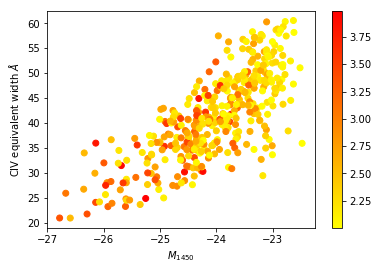

In [9]:
scatter(qsos['absMag'],qsos['emLines'][:,13,1],c=qsos['z'],cmap=cm.autumn_r)
colorbar()
xlabel("$M_{1450}$")
ylabel("CIV equivalent width $\AA$")

### Example spectra

for this example the wavelength cutoff is 30 micron, but the model doesn't include warm dust and thus is invalid beyond a few micron.

Text(0.5,0,'wave [micron]')

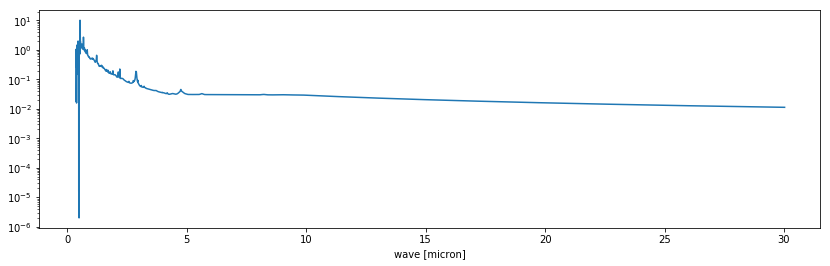

In [10]:
figure(figsize=(14,4))
plot(wave/1e4,qsos['spec'][0])
yscale('log')
xlabel('wave [micron]')

zoom in on the lyman alpha - CIV region:

Text(0.5,1,'$z=2.590$')

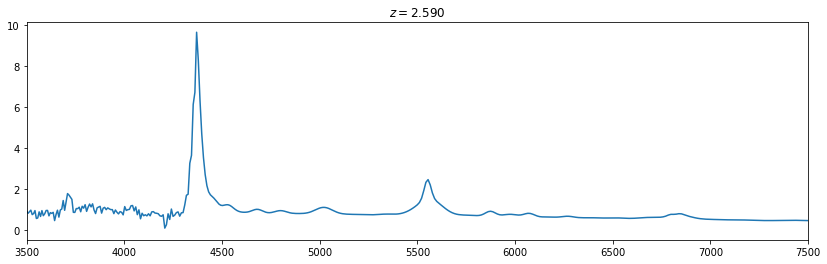

In [11]:
figure(figsize=(14,4))
plot(wave,qsos['spec'][20])
xlim(3500,7500)
title('$z=%.3f$'%qsos['z'][20])

### IGM absorption model (`simqso.hiforest`)

an example of the forest transmission spectra at R=30,000 (the native resolution for the monte carlo forest spectra):

In [2]:
# XXX WARNING -- an ugly hack is needed here. Internally, a table of Voigt profiles is generated 
# at startup in order to speed the forest spectra generation. This table is defined in terms of
# the wave dispersion the first time a simulation is run. Here we are changing the wavelength
# model, and thus before executing the next cells you must restart the kernel and execute only
# the first cell.
np.random.seed(12345)
wave = buildWaveGrid(dict(waveRange=(3500,4800),SpecDispersion=30000))
forest = hiforest.IGMTransmissionGrid(wave,WP11_model,1)
T = forest.next_spec(0,2.9)

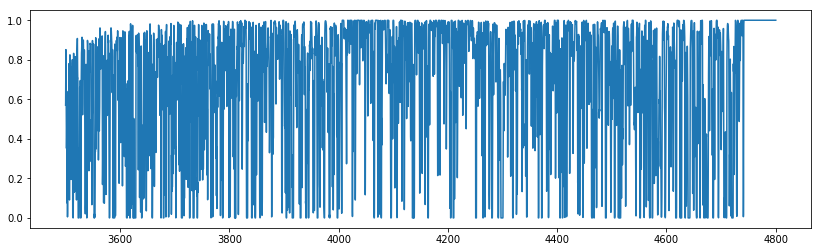

In [3]:
figure(figsize=(14,4))
plot(wave,T)

(4300, 4800)

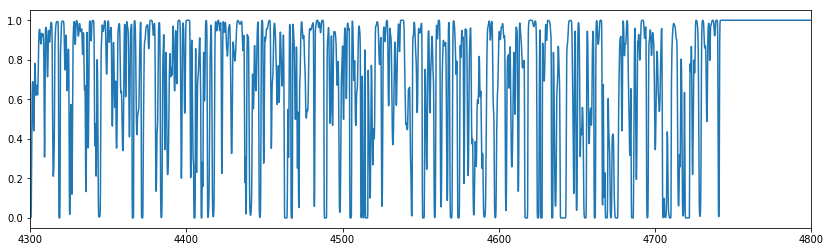

In [4]:
figure(figsize=(14,4))
plot(wave,T)
xlim(4300,4800)